In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_funnel = pd.read_excel('../data/analysis/funnel_ecomerce.xlsx')
df_funnel.head()

,year,total_users,step_1_home,step_2_department,step_3_product,step_4_cart,step_5_purchase
0,2019,1624,1144,1624,1624,1624,1622
1,2020,5186,3670,5181,5180,5179,5175
2,2021,9634,6940,9622,9623,9623,9623
3,2022,15241,10962,15215,15215,15215,15222
4,2023,22939,16719,22894,22894,22894,22915


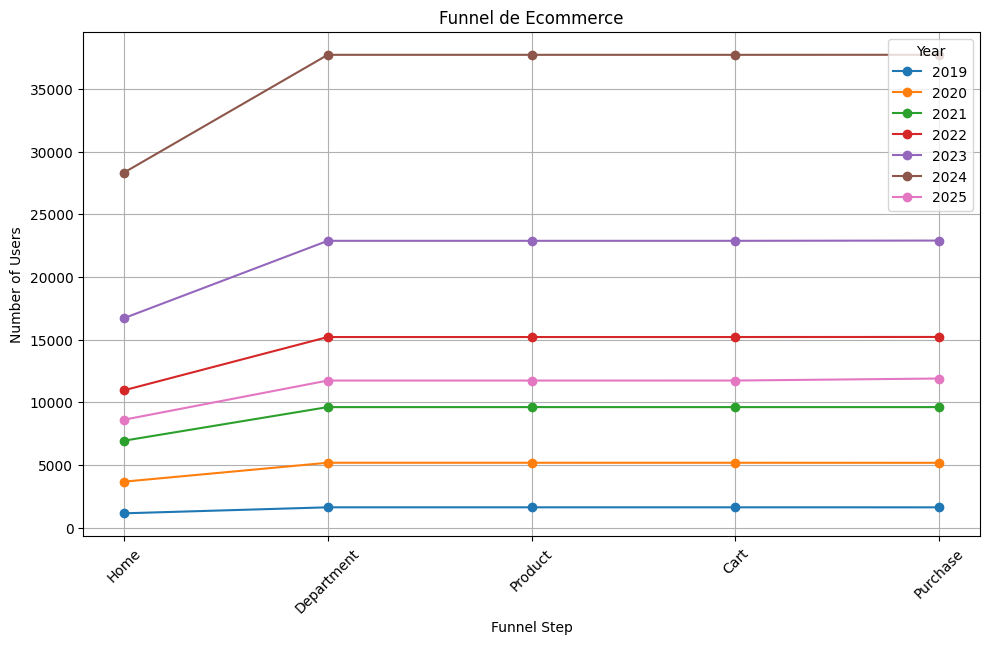

In [14]:
df_melted = df_funnel.melt(id_vars='year',
                    value_vars=['step_1_home', 'step_2_department', 'step_3_product', 'step_4_cart', 'step_5_purchase'],
                    var_name='step', 
                    value_name='users')

# Optional: Clean step labels
df_melted['step'] = df_melted['step'].str.replace('step_\\d+_', '', regex=True).str.title()

# Plot
plt.figure(figsize=(10, 6))
for year in sorted(df_funnel['year']):
    year_data = df_melted[df_melted['year'] == year]
    plt.plot(year_data['step'], year_data['users'], marker='o', label=str(year))

plt.title('Funnel de Ecommerce')
plt.xlabel('Funnel Step')
plt.ylabel('Number of Users')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.savefig('../ppts/funnel_ecommerce.png')
plt.show()

In [8]:
df_fuente_trafico = pd.read_csv('../data/analysis/fuente_trafico_purchase_intention.csv')
df_fuente_trafico.head()

,year,traffic_source,cantidad
0,2019,Adwords,771
1,2019,Email,1131
2,2019,Facebook,246
3,2019,Organic,140
4,2019,YouTube,230


In [9]:
df_fuente_trafico['traffico_agrup'] =df_fuente_trafico['traffic_source']
for year in [2019,2020,2021,2022,2023,2024,2025]:
    df_fuente_trafico.loc[df_fuente_trafico['traffic_source'].isin(['Facebook','YouTube']), 'traffico_agrup']='Social Network'

df_graph = df_fuente_trafico.groupby(['year','traffico_agrup'])['cantidad'].sum().reset_index()

In [13]:
df_temp = pd.pivot(df_graph,index='year',columns='traffico_agrup',values='cantidad')
df_temp['Total'] = df_temp['Adwords'] +df_temp['Email']+df_temp['Organic']+df_temp['Social Network']
cols = ['Adwords','Email','Organic','Social Network']
for col in cols:
    df_temp[col+' %']= df_temp[col]/df_temp['Total']*100
df_temp[[col+' %' for col in cols] +['Total']]

traffico_agrup,Adwords %,Email %,Organic %,Social Network %,Total
year,,,,,
2019,30.619539,44.916600,5.559968,18.903892,2518
2020,30.043753,45.794847,5.092368,19.069033,8228
2021,29.881484,44.647367,5.070915,20.400233,15441
2022,29.701457,45.171803,4.779915,20.346825,24854
2023,30.272410,44.833064,5.125267,19.769259,38398
2024,29.542087,45.322323,5.023665,20.111925,69511
2025,30.313076,44.779006,5.193370,19.714549,21720


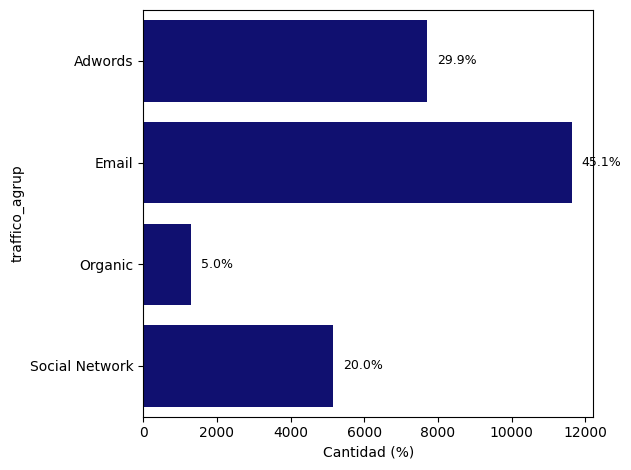

In [37]:
import numpy as np
media_trafico = np.mean(df_temp[cols], axis=0)
total = media_trafico.sum()
sns.barplot(y =media_trafico.index, x= media_trafico.values, color='navy')
for i, value in enumerate(media_trafico.values):
    percent = 100 * value / total
    plt.text(value + total * 0.01, i, f"{percent:.1f}%", va='center', fontsize=9, color='black')

plt.xlabel("Cantidad (%)")
plt.tight_layout()
plt.savefig('../ppts/trafico_intencion_compra_media.png')
plt.show()

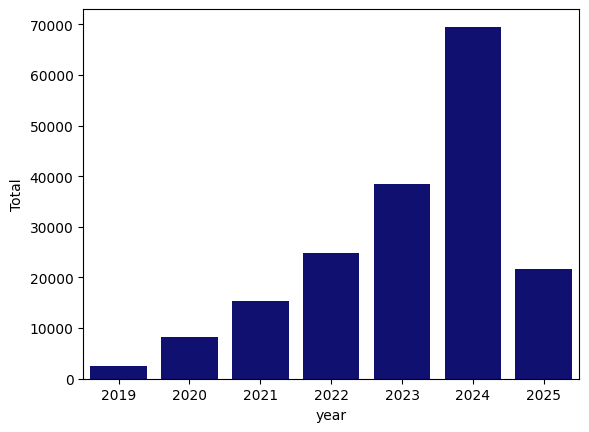

In [ ]:
sns.barplot(df_temp.reset_index(),x ='year', y='Total' , color='navy')
plt.savefig('../ppts/trafico_intencion_compra_evolucion.png')

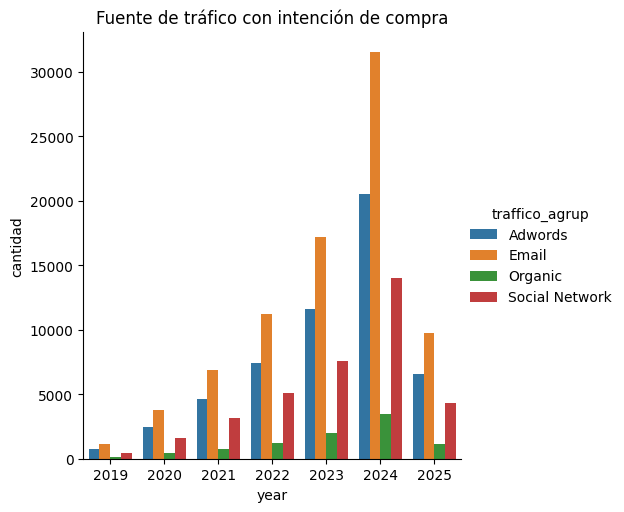

In [43]:
sns.catplot(x='year',y='cantidad',hue='traffico_agrup', data = df_graph, kind='bar')
plt.title('Fuente de tráfico con intención de compra')
plt.show()

In [46]:
df_status_ordenes = pd.read_csv('status_ordenes.csv')
df_status_ordenes.head()

FileNotFoundError: [Errno 2] No such file or directory: 'status_ordenes.csv'

In [52]:
df_temp = df_status_ordenes.groupby('year')['cantidad'].sum().reset_index()
df_temp.rename(columns={'cantidad':'total'}, inplace=True)
df_status_ordenes = df_status_ordenes.merge(df_temp, on='year')
df_status_ordenes['percentage'] = df_status_ordenes['cantidad']/df_status_ordenes['total']
df_status_ordenes.head()

,year,status,cantidad,total,percentage
0,2019,Cancelled,279,1734,0.160900
1,2019,Complete,428,1734,0.246828
2,2019,Processing,365,1734,0.210496
3,2019,Returned,157,1734,0.090542
4,2019,Shipped,505,1734,0.291234


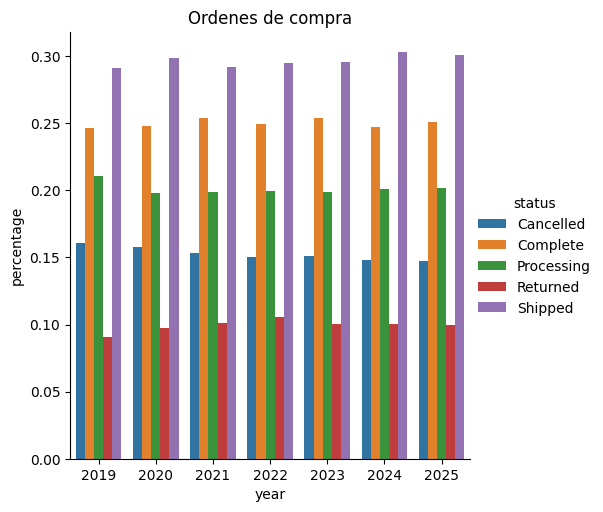

In [ ]:
sns.catplot(x='year',y='percentage',hue='status', data = df_status_ordenes, kind='bar',)
plt.title('Ordenes de compra')
plt.show()

In [41]:
df_compras_anuales = pd.read_csv('../data/analysis/compras anuales.csv')
df_compras_anuales.head()

,year,cantidad_compras,cant_usuarios
0,2019,1,408
1,2019,2,10
2,2020,1,1339
3,2020,2,29
4,2021,1,2581


In [45]:
df_temp = pd.pivot(df_compras_anuales,index='year',columns='cantidad_compras',values='cant_usuarios')
df_temp

cantidad_compras,1,2,3,4
year,,,,
2019,408.0,10.0,NaN,NaN
2020,1339.0,29.0,NaN,NaN
2021,2581.0,60.0,NaN,NaN
2022,4037.0,111.0,4.0,NaN
2023,6209.0,260.0,4.0,NaN
2024,10478.0,674.0,38.0,NaN
2025,3260.0,183.0,15.0,2.0


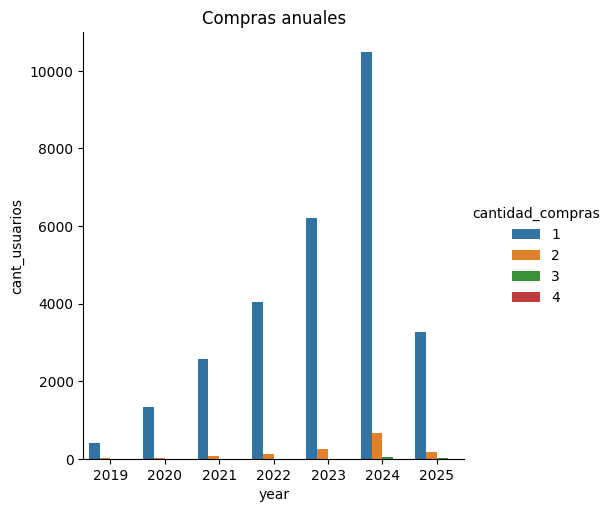

In [43]:
sns.catplot(x='year',y='cant_usuarios',hue='cantidad_compras', data = df_compras_anuales, kind='bar',)
plt.title('Compras anuales')
plt.show()